<a href="https://colab.research.google.com/github/hbhb0311/LikelionStudy/blob/main/2.ML_basic/1.ML_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 시작하기

## Decision Tree

### 데이터 불러오기

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
X = iris.data[:,[2,3]]
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
#stratify : input dataset의 클래스의 비율과 같은 비율을 갖게 만듦

### Decision Tree 만들기

In [5]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [6]:
tree = DecisionTreeClassifier(criterion = 'gini',
                              max_depth = 4,
                              random_state = 1, )
# criterion : 불순도 계수 어떤 것을 사용할 것인지 (gini, entropy)
# max_depth : 최대 깊이

In [7]:
# 모델에 fit하기
tree.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### 결정나무 시각화

In [8]:
# 결정나무 시각화
dot_data = export_graphviz(tree,
                           filled = True,
                           rounded = True,
                           class_names = ['setosa', 
                                         'versicolor', 
                                         'virginica'],
                           feature_names = ['petal length (cm)',
                                            'petal width (cm)'],
                           out_file = None)

# out_file = None : tree.dot 중간 파일을 디스크에 만들지 않고 바로 dot_data 변수에 할당

In [9]:
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

### 그래프로 시각화

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [11]:
# 그래프 함수 만들기
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  
  # 마커와 컬러맵 설정하기
  markers = ['s', 'x', 'o', '^', 'v']
  colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계를 그리기
  x1min, x1max = X[:,0].min()-1, X[:,0].max()+1
  x2min, x2max = X[:,1].min()-1, X[:,1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution),
                         np.arange(x2min, x2max, resolution))
  # meshgrid : 정방행렬로 만들어줌 (n * n 행렬으로 만듦)

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  # ravel : 다차원 배열을 1차원 배열으로 평평하게 펴줌
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  # 경계선에 따라 격자로 나누어줌
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # 그래프를 그려줌
  for idx, c1 in enumerate(np.unique(y)):
    plt.scatter(x = X[y == c1, 0],
                y = X[y == c1, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = c1,
                edgecolor = 'black')
  
  # 테스트 샘플을 부각하여 그림 
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:,0],
                X_test[:,1],
                facecolors = 'none',
                edgecolor = 'black',
                alpha = 1,
                linewidth = 1,
                marker = 'o',
                s = 100,
                label = 'test set')

In [13]:
# meshgrid : 정방행렬로 만들어줌 (n * n 행렬으로 만듦)

x1min, x1max = X[:,0].min()-1, X[:,0].max()+1
x2min, x2max = X[:,1].min()-1, X[:,1].max()+1

xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 0.02),
                         np.arange(x2min, x2max, 0.02))
print(len(xx1[0]))
print(len(xx1))
print(xx1)
print(xx2)

395
220
[[0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 ...
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]]
[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 [-0.86 -0.86 -0.86 ... -0.86 -0.86 -0.86]
 ...
 [ 3.44  3.44  3.44 ...  3.44  3.44  3.44]
 [ 3.46  3.46  3.46 ...  3.46  3.46  3.46]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]]


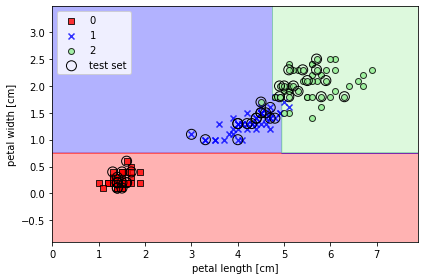

In [14]:
Xcombined = np.vstack((train_X, test_X))
ycombined = np.hstack((train_Y, test_Y))

plot_decision_regions(Xcombined, ycombined,
                      tree, test_idx = range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
np.vstack((train_X, test_X))
# 세로로 붙여주기

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2],
       [5.6, 2.4],
       [6.6, 2.1],
       [1.2, 0.2],
       [5.8, 1.6],
       [4.6, 1.3],
       [3.3, 1. ],
       [3.9, 1.4],
       [1.3, 0.2],
       [4.7, 1.2],
       [4. , 1.3],
       [5.1, 1.9],
       [1.9, 0.2],
       [3.5, 1. ],
       [3.9, 1.2],
       [1.6, 0.2],
       [4.8, 1.8],
       [6.9, 2.3],
       [4.5, 1.5],
       [4.5, 1.3],
       [3.8, 1.1],
       [5.6, 2.4],
       [4.7, 1.4],
       [5.6, 1.4],
       [5.8, 2.2],
       [5.1, 2.4],
       [4.1, 1.3],
       [1.5, 0.4],
       [6.7, 2.2],
       [5. , 1.9],
       [4.8, 1.8],
       [5.6, 2.1],
       [4.2, 1.5],
       [6.7, 2. ],
       [5.5, 1.8],
       [1.6, 0.2],
       [4.9, 1.8],
       [1.4, 0.2],
       [5.1, 1.5],
       [1.9, 0.4],
       [1. , 0.2],
       [4.9, 1.5],
       [1.5, 0.2],
       [1.1, 0.1],
       [5.5, 1.8],
       [4.7, 1.5],
       [1.7, 0.3],
       [3.5, 1. ],
       [4.1,

In [16]:
np.hstack((train_Y, test_Y))
# hstack : 가로로 붙여주기

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1,
       1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0])

## KNN 알고리즘

### 데이터 표준화

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # 데이터 표준화 준비과정
sc.fit(train_X) # 학습 과정

# 데이터 표준화
train_X_std = sc.transform(train_X)
test_X_std = sc.transform(test_X)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 만들기
knn = KNeighborsClassifier(n_neighbors = 5,
                           metric = 'minkowski')

# 학습시키기
knn.fit(train_X_std, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 시각화

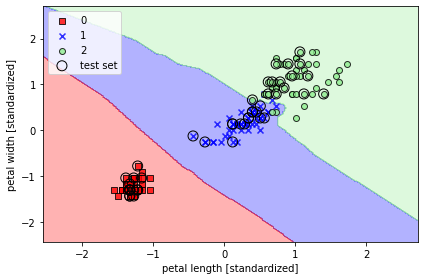

In [19]:
Xcombined_std = np.vstack((train_X_std, test_X_std))
ycombined = np.hstack((train_Y, test_Y))

plot_decision_regions(Xcombined_std, ycombined,
                      knn, test_idx = range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend()
plt.tight_layout()
plt.show()